<a href="https://colab.research.google.com/github/nlreiser/MSDS-Machine-Learning/blob/main/Reiser_HousePrices_Models1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices: EDA (Kaggle) for MSDS 422 M1 Asmt1

## Ingest

In [989]:
# Import modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.stats.outliers_influence as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#py.test --nbval Reiser_M1_House_Prices.ipynb

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [990]:
#Set display to max rows/columns to view all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

*House Prices Data from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)*

In [991]:
# Import test and train datasets
df_test = pd.read_csv('https://raw.githubusercontent.com/nlreiser/MSDS-Machine-Learning/main/Datasets/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/nlreiser/MSDS-Machine-Learning/main/Datasets/train.csv')

# View first lines of training data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [992]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [993]:
# View first lines of test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [994]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [995]:
#Determine shape of the training data
df_train.shape

(1460, 81)

In [996]:
#Determine shape of the test data
df_test.shape

(1459, 80)

## EDA: Train Data

In [997]:
# Get preliminary descriptive statistics about the training data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [998]:
#Retrieve information about the quant/qual variables in the data and if there are any null values in the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [999]:
#Check for any duplicate rows 
duplicate_rows = df_train[df_train.duplicated()]
duplicate_rows.shape

(0, 81)

In [1000]:
#Create quantitative and qualitative independent variable sets
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

#Check number of each variable type
print("Number of Numerical features: ", len(quantitative))
print("Number of Categorical features: ", len(qualitative))

Number of Numerical features:  36
Number of Categorical features:  43


There are 81 variables in the data, including Id and SalePrice. 36 variables are quantitative (numerical) and 43 variables are qualitative (categorical). Object datatypes are put in the qualitative bucket and non-object datatypes are put into the quantitative bucket for further analysis. 

In [1001]:
#To reduce the number of variables, total bathrooms will be added (full and half bathrooms will be separate).
df_train['Baths'] = df_train['BsmtFullBath'] + df_train['FullBath'] 
df_train['HalfBaths'] = df_train['BsmtHalfBath'] + df_train['HalfBath']
df_train['Baths'].value_counts()

2    750
1    371
3    319
4     18
6      1
0      1
Name: Baths, dtype: int64

In [1002]:
df_train['HalfBaths'].value_counts()

0    855
1    572
2     29
3      3
4      1
Name: HalfBaths, dtype: int64

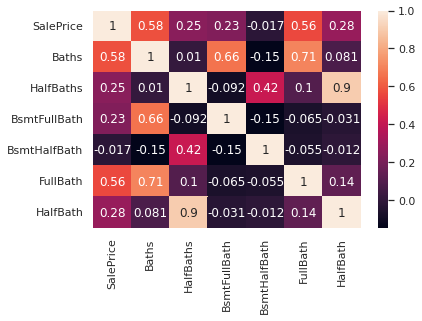

In [1003]:
# Check the correlation between SalePrice, the new variable, and the previous variables
sns.heatmap(df_train[['SalePrice', 'Baths', 'HalfBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].corr(), annot=True)
plt.show()

In [1004]:
#Quantitatively add bathroom (full bathroom are one's place, half bathrooms are tenth's place)
df_train['TotalBaths_Full.Half'] = df_train['Baths'] + 0.1*(df_train['HalfBaths'])
df_train['TotalBaths_Full.Half'].value_counts()

2.0    443
2.1    293
1.0    228
3.0    172
3.1    144
1.1    129
2.2     14
1.2     12
4.0     11
4.1      6
1.3      2
3.2      2
3.3      1
4.2      1
0.4      1
6.0      1
Name: TotalBaths_Full.Half, dtype: int64

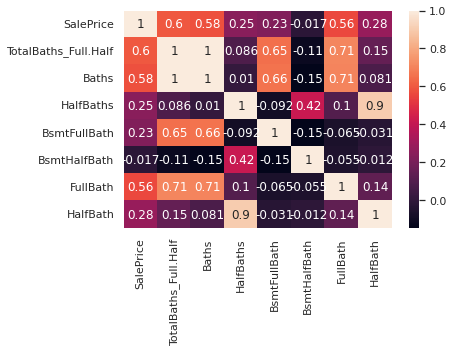

In [1005]:
#Plot heatmap of combined bathrooms
sns.heatmap(df_train[['SalePrice', 'TotalBaths_Full.Half', 'Baths', 'HalfBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].corr(), annot=True)
plt.show()

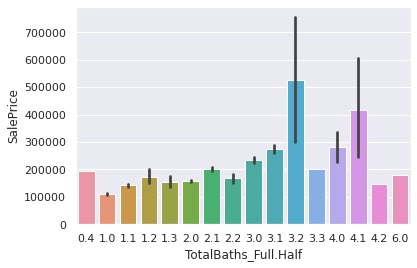

In [1006]:
#Plot bar graph of bathrooms vs saleprice
sns.barplot(x='TotalBaths_Full.Half', y='SalePrice', data=df_train)

In [1007]:
#Incase more detail is needed, explanation for each bathroom addition is added
df_train['TotalBaths'] = df_train['Baths'].map(str) + 'Full,' + df_train['HalfBaths'].map(str) + 'Half'
df_train['TotalBaths'].value_counts()

2Full,0Half    443
2Full,1Half    293
1Full,0Half    228
3Full,0Half    172
3Full,1Half    144
1Full,1Half    129
2Full,2Half     14
1Full,2Half     12
4Full,0Half     11
4Full,1Half      6
1Full,3Half      2
3Full,2Half      2
4Full,2Half      1
3Full,3Half      1
0Full,4Half      1
6Full,0Half      1
Name: TotalBaths, dtype: int64

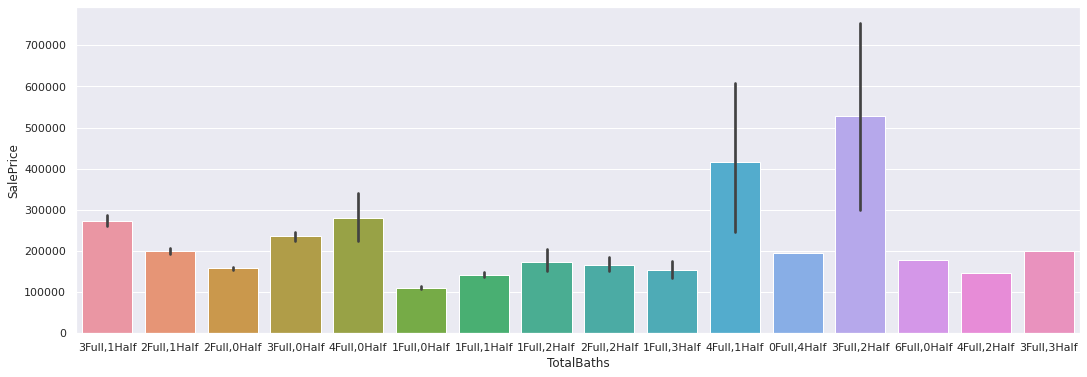

In [1008]:
# Check the barplot between TotalBaths_Full.Half and TotalBaths to confirm no changes
# Keep TotalBaths to be encoded later, delete TotalBaths_Full.Half
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x='TotalBaths', y='SalePrice', data=df_train)

In [1009]:
#Drop bath columns that are no longer needed 
df_train = df_train.drop(['Baths', 'HalfBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotalBaths_Full.Half'], axis=1)

In [1010]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

In [1011]:
#To further reduce number of variables, square footage will be totaled (garage not included)
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['GrLivArea']

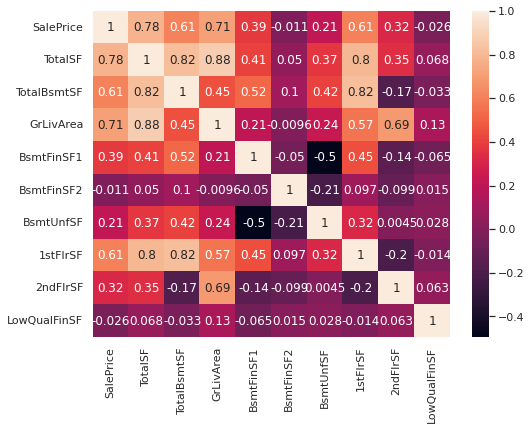

In [1012]:
#Plot heatmap of total square footage
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df_train[['SalePrice', 'TotalSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']].corr(), annot=True)
plt.show()

In [1013]:
#Drop area columns that are no longer needed 
df_train = df_train.drop(['TotalBsmtSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1)

In [1014]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType',

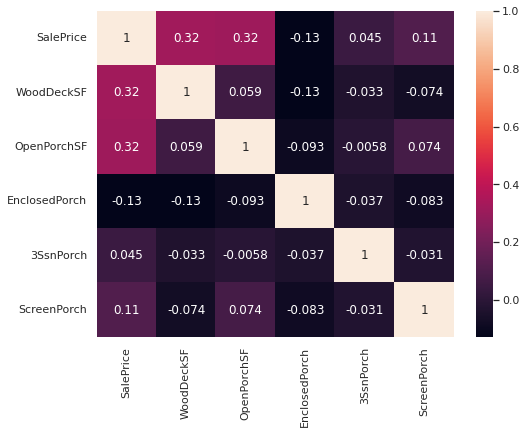

In [1015]:
#Plot heatmap of outdoor area features
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df_train[['SalePrice', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].corr(), annot=True)
plt.show()

In [1016]:
#To further reduce number of variables, total deck and porch square footage is calculated
df_train['Deck_PorchSF'] = df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']

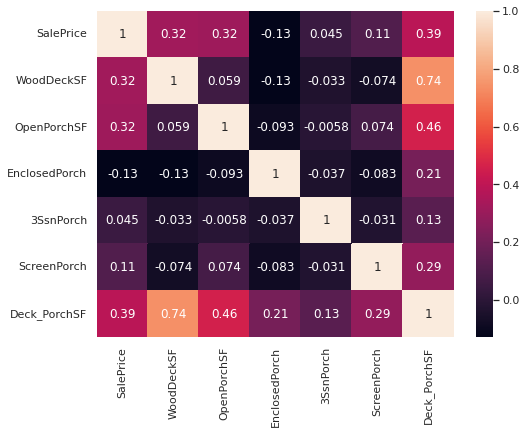

In [1017]:
#Plot heatmap of outdoor area features
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df_train[['SalePrice', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Deck_PorchSF']].corr(), annot=True)
plt.show()

Having a deck or porch does not have a very strong correlation with SalePrice compared to other features. To further reduce the number of variables, the individual square footage will be dropped and the total Deck_PorchSF will be kept. 

In [1018]:
#Drop area columns that are no longer needed 
df_train = df_train.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

In [1019]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'TotalBaths',
       'TotalSF', 'Deck_PorchSF'],
 

###Target Variable Distribution: SalePrice

In [1020]:
#Get descriptive statistics on the SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

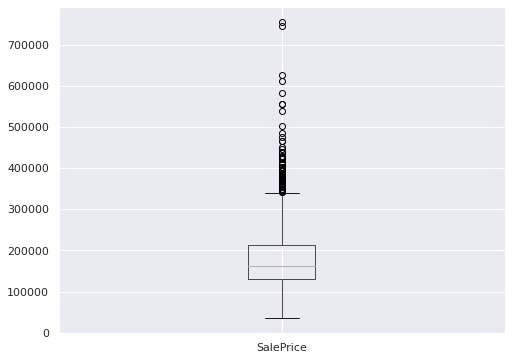

In [1021]:
#Create a boxplot of SalePrice to view spread of the costs of houses
df_train.boxplot(column=['SalePrice'])

Skewness: 1.882876
Kurtosis: 6.536282


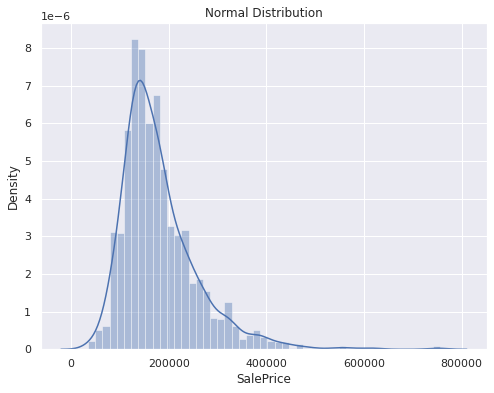

In [1022]:
#Plot distribution of SalePrice
sns.distplot(df_train['SalePrice'])
plt.title('Normal Distribution')
#Find skewness and kurtosis 
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


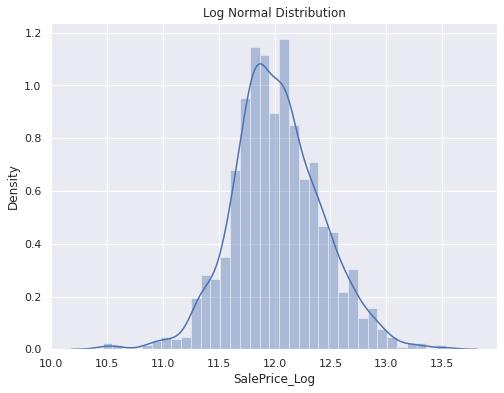

In [1023]:
#The plot of SalePrice is not normally distributed - right skewed 
#Transform SalePrice data to log scale to see if it improves the distribution
df_train['SalePrice_Log']=np.log(df_train['SalePrice'])

#View the new distribution plot of SalePrice after log transformation
sns.distplot(df_train['SalePrice_Log'])
plt.title('Log Normal Distribution')
#Find skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

### Null Values - Missing Features

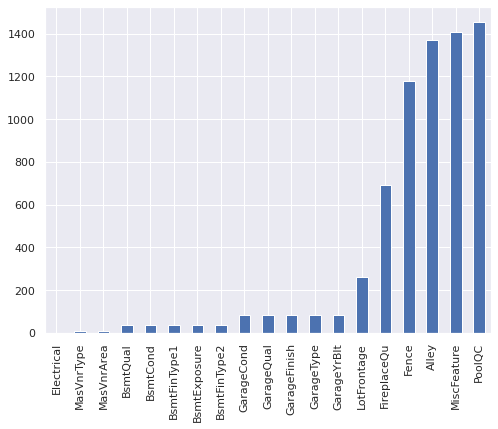

In [1024]:
#Find where the null values exist in the training dataset by plotting the counts per variable 
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

19 independent variables have null values. From reading the data description we find that the null values are features that the houses do not have (for example no pool, no basement, etc.) rather than absent data. Replacing the nulls with 0 (quantitative) and missing (qualitative) will allow for accurate distribution plots.  

In [1025]:
#Rerun quantitative and qualitative independent variable sets
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('SalePrice_Log')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

#Check number of each variable type
print("Number of Numerical features: ", len(quantitative))
print("Number of Categorical features: ", len(qualitative))

Number of Numerical features:  21
Number of Categorical features:  44


In [1026]:
#Replace null values with value of 0 for quantitative data and 'Missing' for qualitative data
for c in qualitative:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['Missing'])
        df_train[c] = df_train[c].fillna('Missing')

df_train[quantitative] = df_train[quantitative].fillna(0)

### Independent Variable Distributions

In [1027]:
#Test if any of the quantitative variables follow a normal distribution
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df_train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


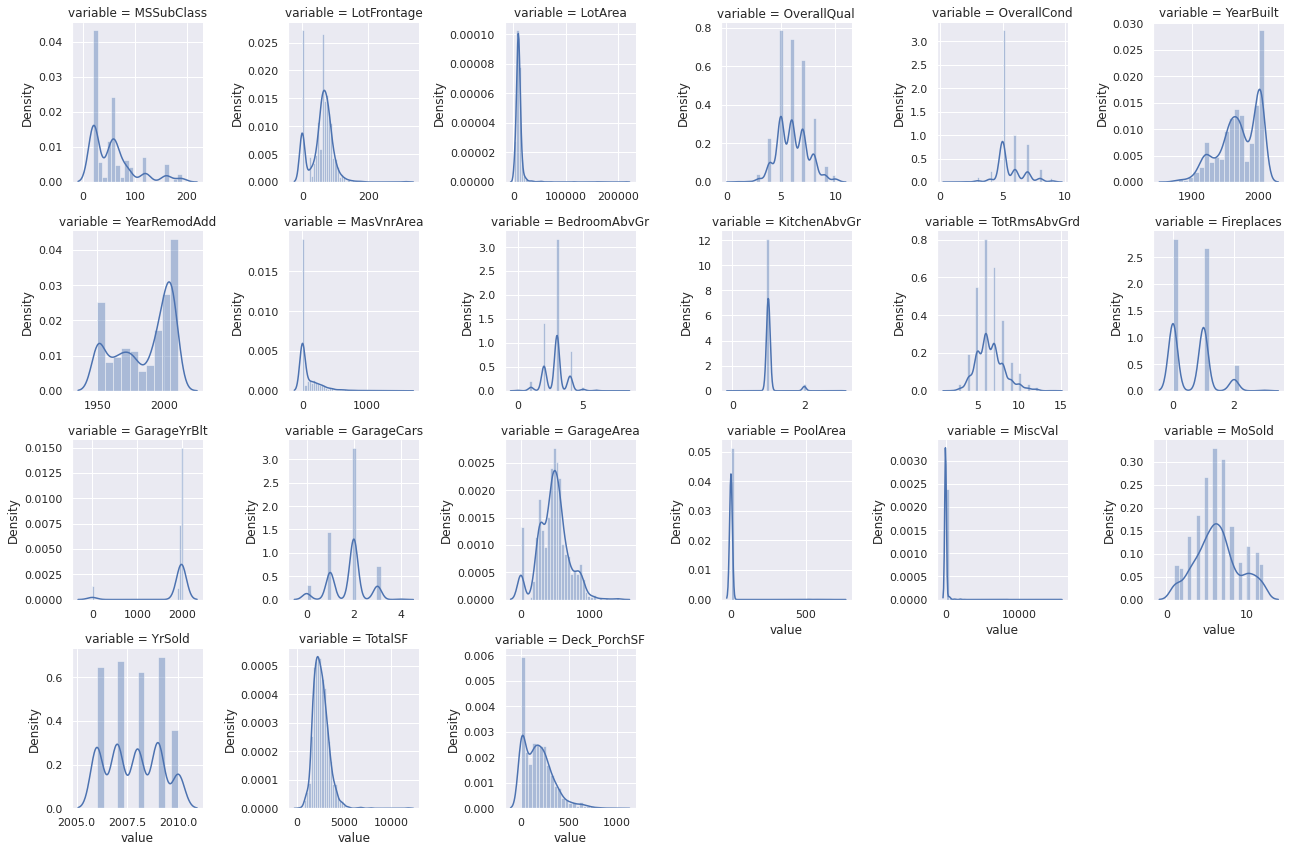

In [1028]:
f = pd.melt(df_train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [1029]:
#Plot histograms of quantitative features 
#df_train[quantitative].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

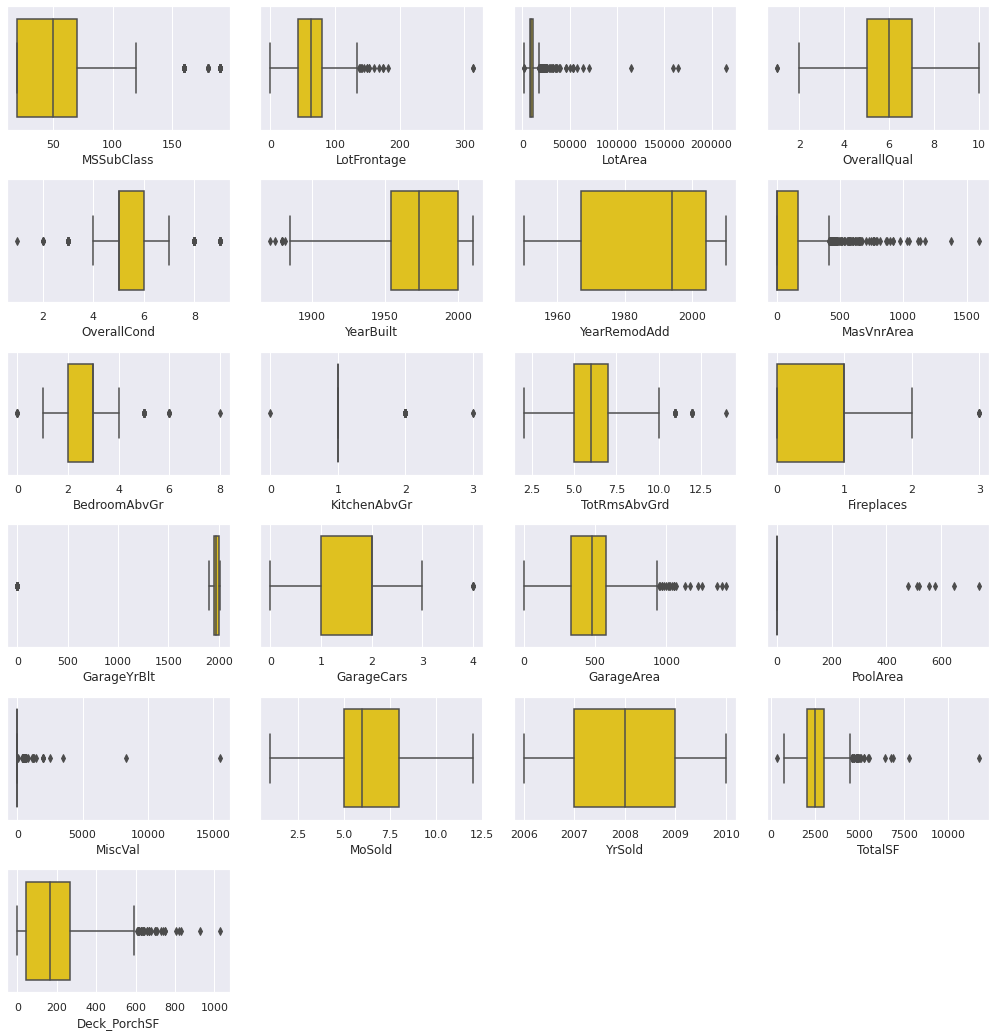

In [1030]:
#Plot boxplots to determine quartiles and outliers for quantitative variables
sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,50))

a=len(quantitative)   # No. of rows in subplot
b=4                        # No. of plots in each row
c=1                        # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in quantitative:
    plt.subplot(a,b,c)
    sns.boxplot(x = data[features], color = 'gold')  # To check for outliers
    c = c + 1  # Incrementing figure counter
     

fig.tight_layout()
plt.show()

In [1031]:
#Find skewness and kurtosis of quantitative variables
skew = df_train[quantitative].skew()
kurt = df_train[quantitative].kurt()
skew_kurt = pd.DataFrame()
skew_kurt['Skewness'] = skew
skew_kurt['Kurtosis'] = kurt
skew_kurt

,Skewness,Kurtosis
MSSubClass,1.407657,1.580188
LotFrontage,0.267822,3.610678
LotArea,12.207688,203.243271
OverallQual,0.216944,0.096293
OverallCond,0.693067,1.106413
YearBuilt,-0.613461,-0.439552
YearRemodAdd,-0.503562,-1.272245
MasVnrArea,2.677616,10.141416
BedroomAbvGr,0.211790,2.230875
KitchenAbvGr,4.488397,21.532404


Quantitative variables that may have better distribution after log transformation include: LotArea, KitchenAbvGr, EnclosedPorch, 3SsnPorch, PoolArea, and MiscVal. Other variables may impact the price if they are missing, such as no second floor or no garage.

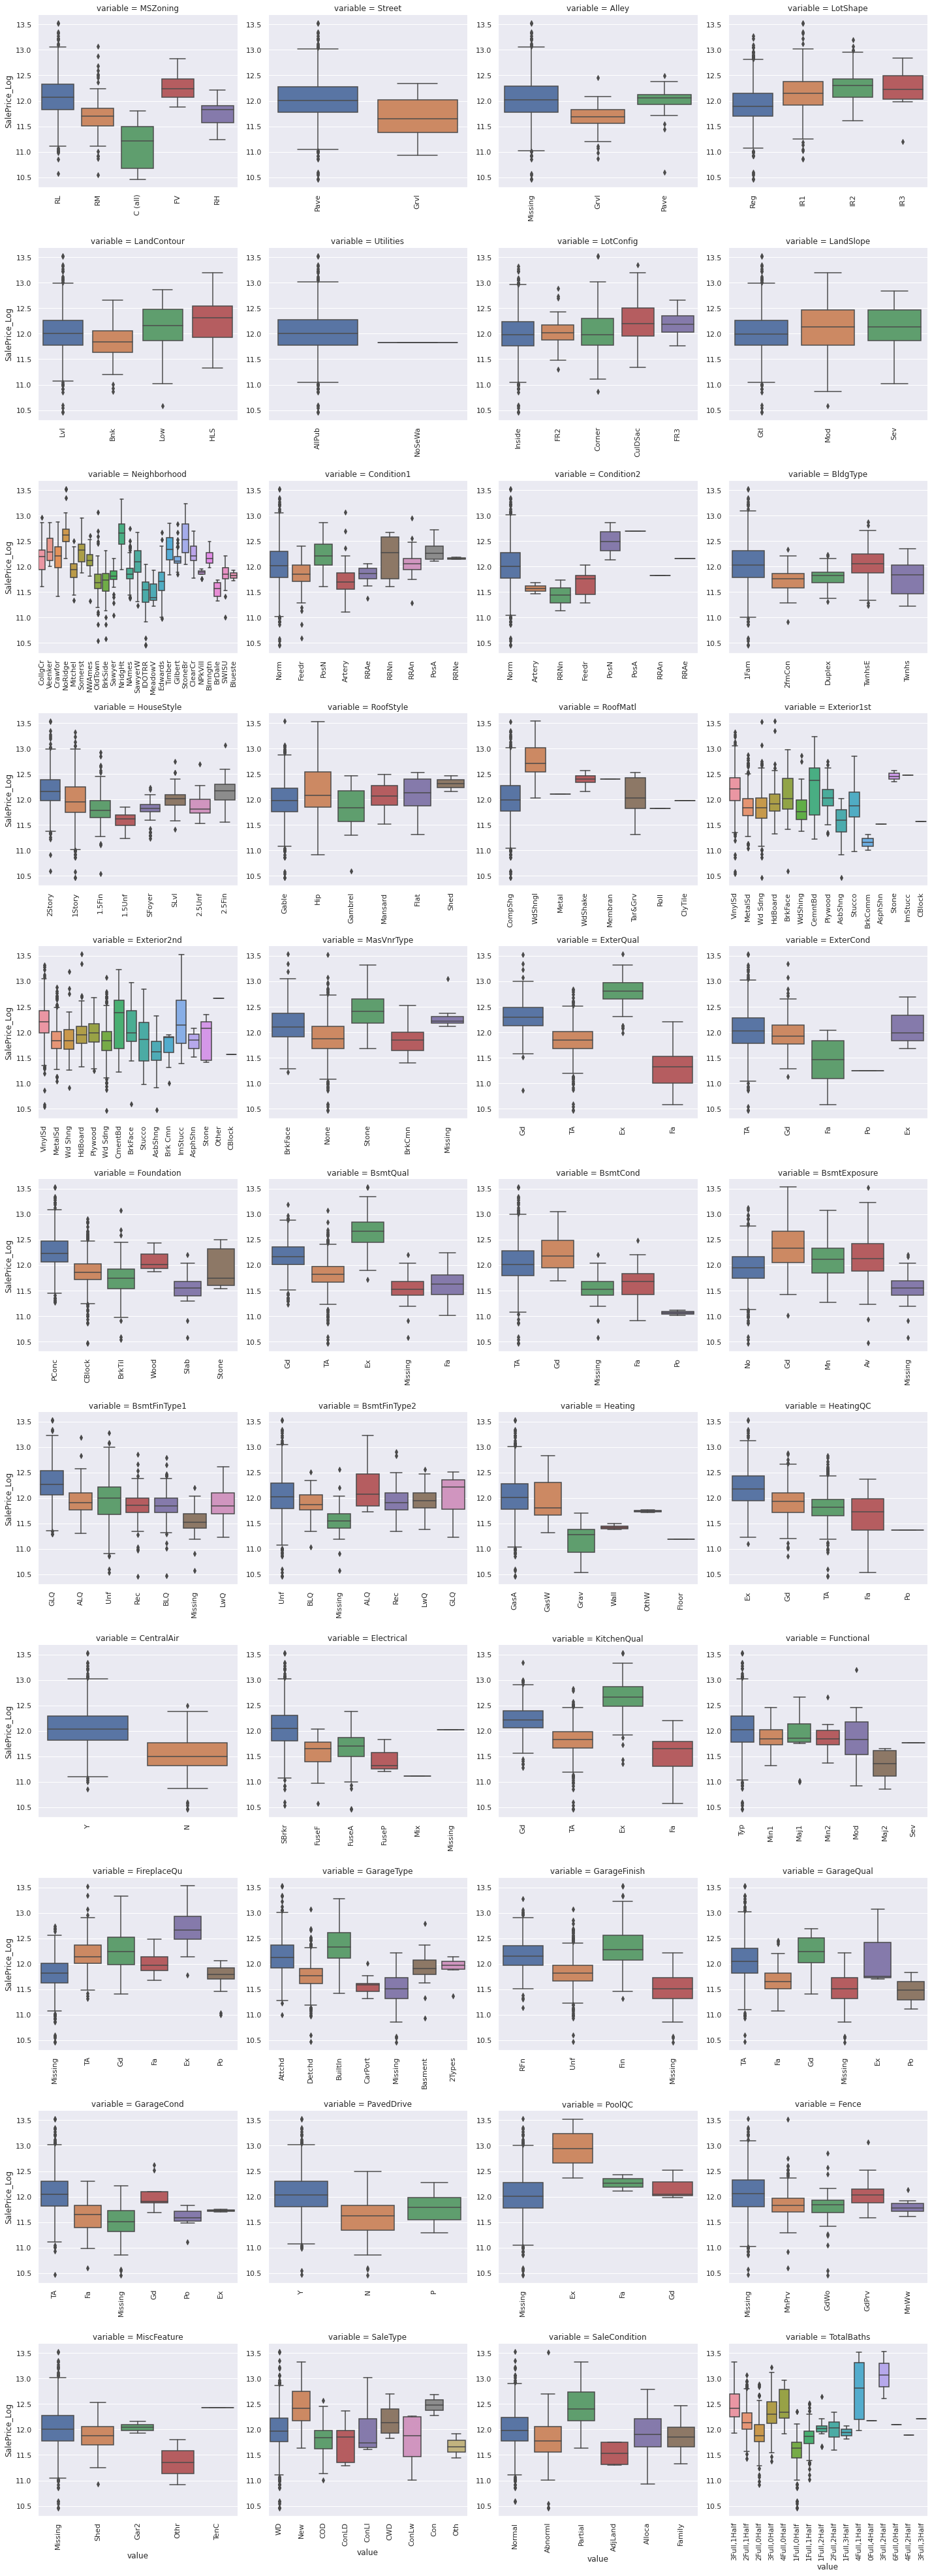

In [1032]:
#Create boxplots of qualitative variables against SalePrice_Log 
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice_Log'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice_Log")

The qualitative variables have varying impact on the price of the home. Neighborhood impacts the cost of the home, as does having more or less bathrooms. Certain features around the home can raise or lower the cost, for example living near a park can increase the value, while being near a main road may lower the value. Having a kitchen in excellent quality increases the value of the home, as does having a pool in excellent quality. The most expensive homes are partially completed when they are assessed. 

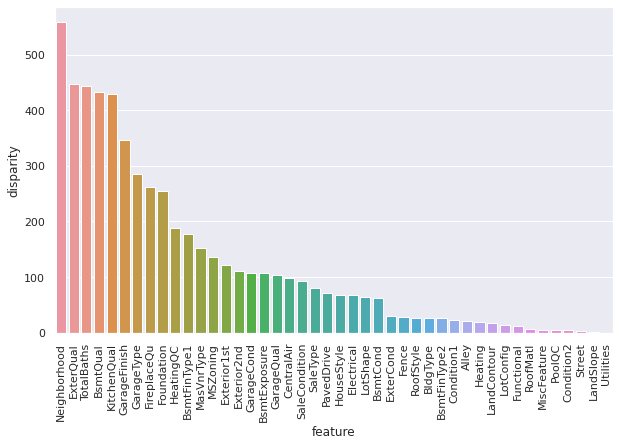

In [1033]:
#Run anova test to estimate how qualitative variables affect SalePrice
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice_Log'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

sns.set(rc = {'figure.figsize':(10,6)})
a = anova(df_train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [1034]:
#Encode qualitative data to link each qualitative variable type to a number based on SalePrice
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice_Log']].groupby(feature).mean()['SalePrice_Log']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df_train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E', 'TotalBaths_E']


In [1035]:
df_train[qual_encoded].head()

,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E,TotalBaths_E
0,4.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,16.0,4.0,5.0,4.0,7.0,2.0,3.0,13.0,14.0,3.0,3.0,4.0,6.0,4.0,4.0,2.0,7.0,6.0,6.0,5.0,2.0,6.0,3.0,7.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0,13.0
1,4.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,21.0,2.0,5.0,4.0,5.0,2.0,3.0,7.0,7.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,5.0,6.0,6.0,5.0,2.0,6.0,2.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0,9.0
2,4.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,16.0,4.0,5.0,4.0,7.0,2.0,3.0,13.0,14.0,3.0,3.0,4.0,6.0,4.0,4.0,3.0,7.0,6.0,6.0,5.0,2.0,6.0,3.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0,13.0
3,4.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,18.0,4.0,5.0,4.0,7.0,2.0,3.0,5.0,8.0,2.0,2.0,4.0,2.0,3.0,5.0,2.0,5.0,6.0,6.0,4.0,2.0,6.0,3.0,7.0,5.0,3.0,2.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,2.0,4.0
4,4.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,25.0,4.0,5.0,4.0,7.0,2.0,3.0,13.0,14.0,3.0,3.0,4.0,6.0,4.0,4.0,4.0,7.0,6.0,6.0,5.0,2.0,6.0,3.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0,13.0


### Correlations

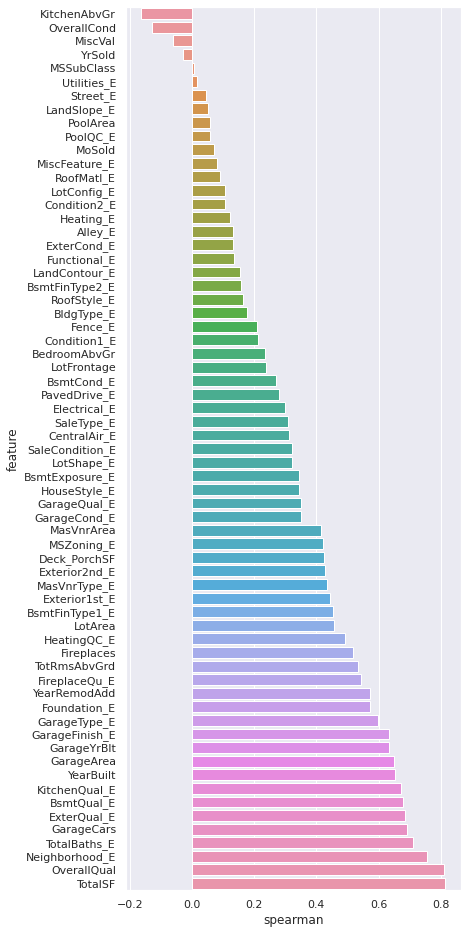

In [1036]:
#Plot correlations between SalePrice and independent variables, while ignoring confounding variables
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice_Log'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6,0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(df_train, features)

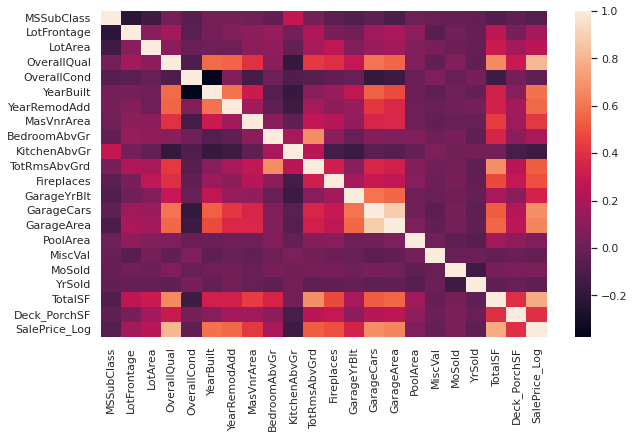

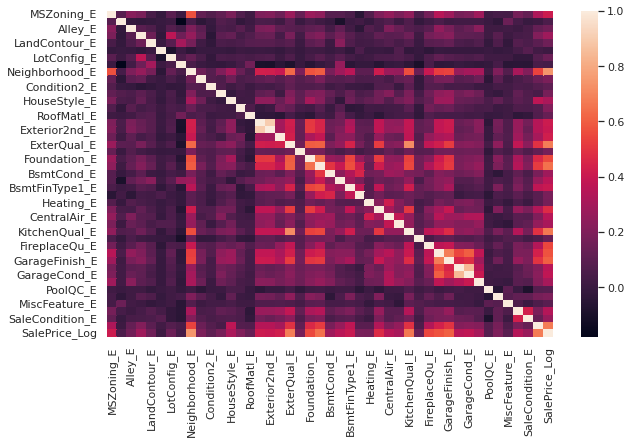

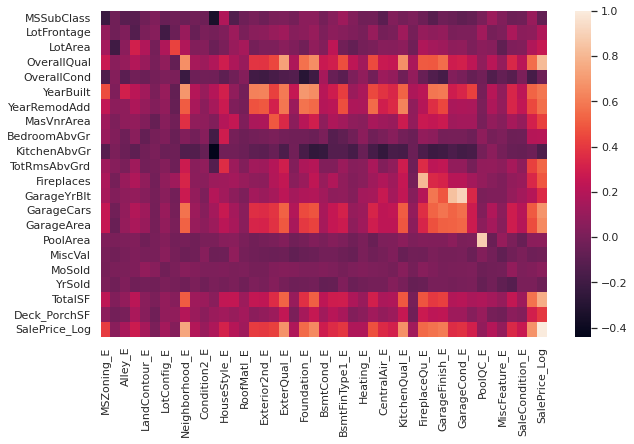

In [1037]:
#Plot heatmaps to find correlations between variables (and any confounding variables)
plt.figure(1)
corr = df_train[quantitative+['SalePrice_Log']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = df_train[qual_encoded+['SalePrice_Log']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice_Log'], columns=qual_encoded+['SalePrice_Log'])
for q1 in quantitative+['SalePrice_Log']:
    for q2 in qual_encoded+['SalePrice_Log']:
        corr.loc[q1, q2] = df_train[q1].corr(df_train[q2])
sns.heatmap(corr)

GarageCars and GarageArea have a high correlation. GarageCars has a higher correlation with SalePrice, so GarageArea will be dropped. 

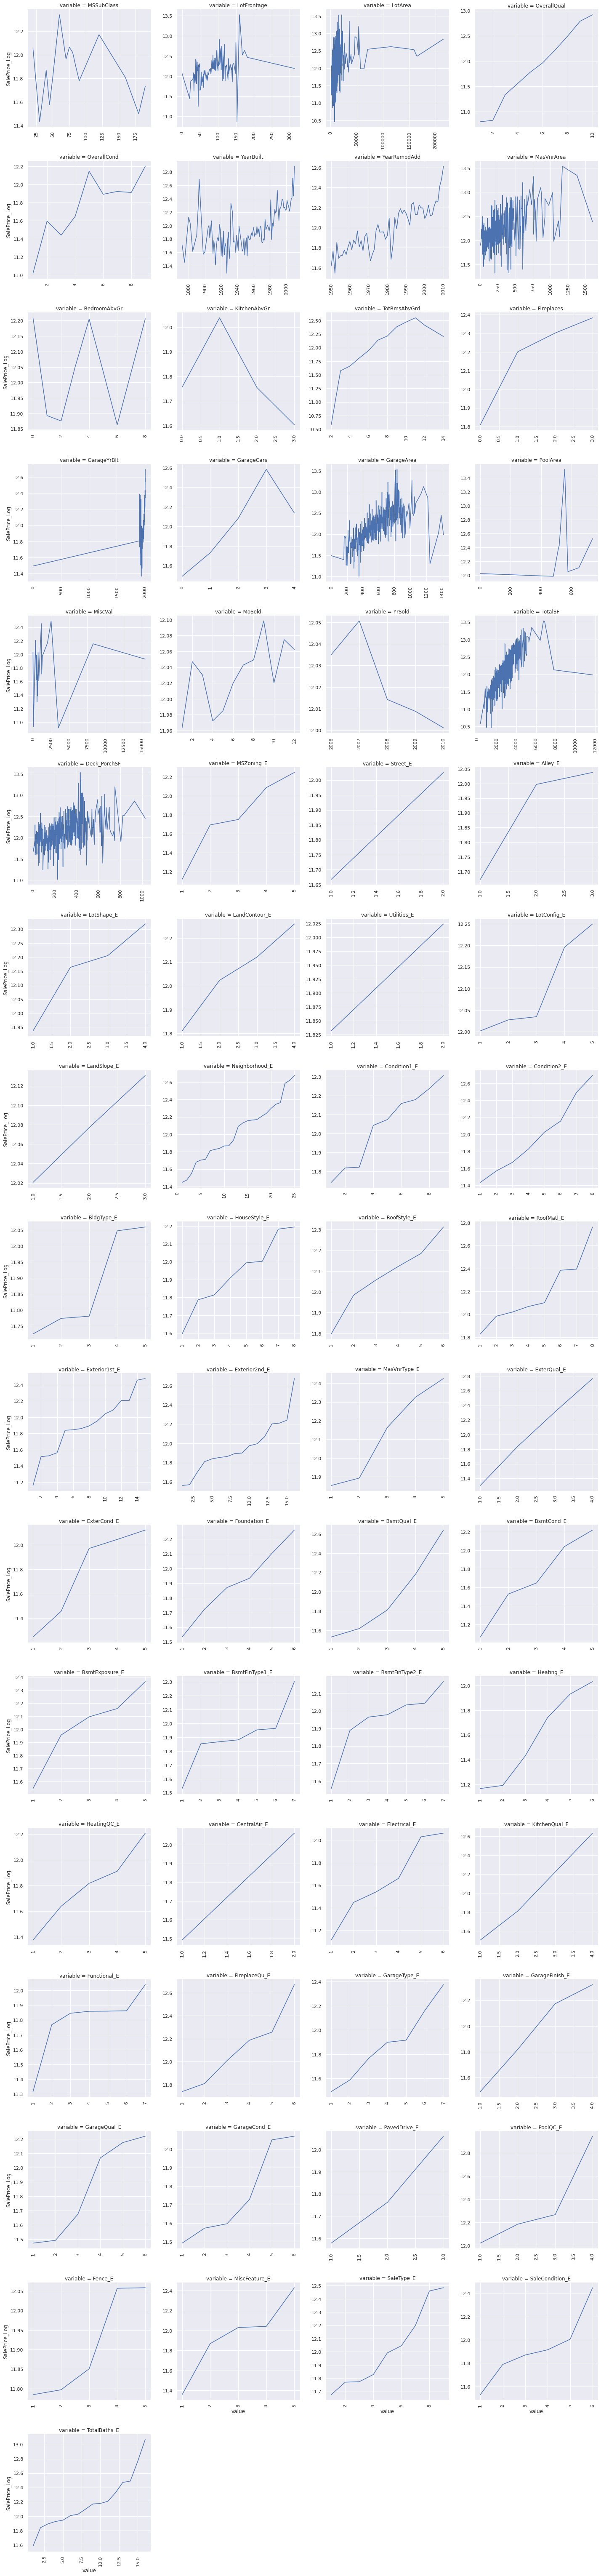

In [1038]:
#Plot pairplots to determine how SalePrice changes with each independent variable
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice_Log'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice_Log")

In [1039]:
#Drop GarageArea column since it is highly correlated with GarageCars
df_train = df_train.drop(['GarageArea'], axis=1)

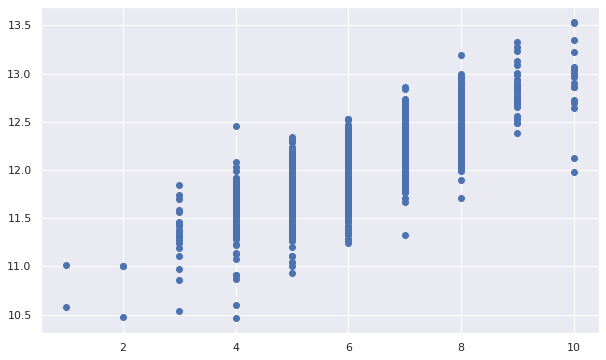

In [1040]:
#Plot OverallQual vs SalePrice
plt.scatter(df_train['OverallQual'],df_train['SalePrice_Log'])

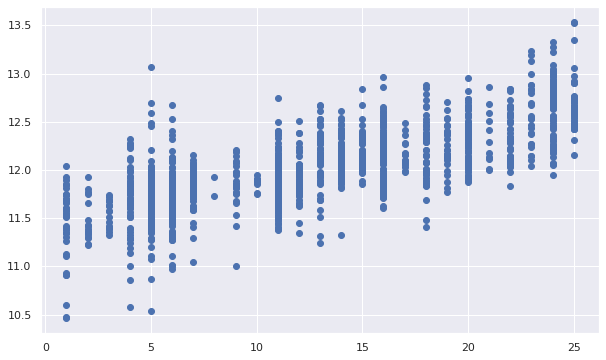

In [1041]:
#Plot Neighborhood_E vs SalePrice
plt.scatter(df_train['Neighborhood_E'],df_train['SalePrice_Log'])

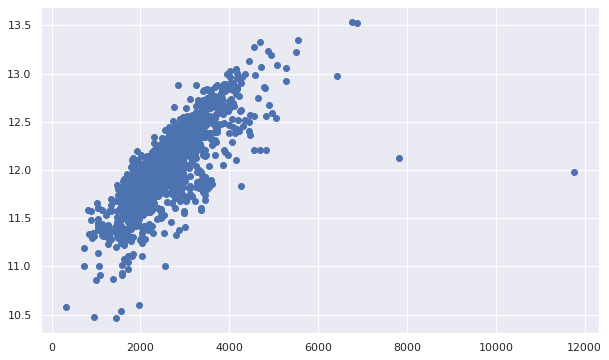

In [1042]:
#Plot TotalSF vs SalePrice
plt.scatter(df_train['TotalSF'],df_train['SalePrice_Log'])

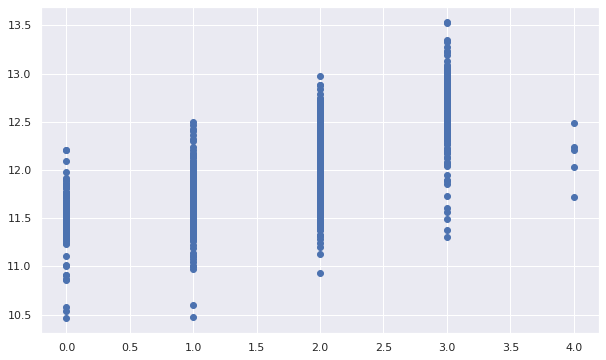

In [1043]:
#Plot GarageCars vs SalePrice
plt.scatter(df_train['GarageCars'],df_train['SalePrice_Log'])

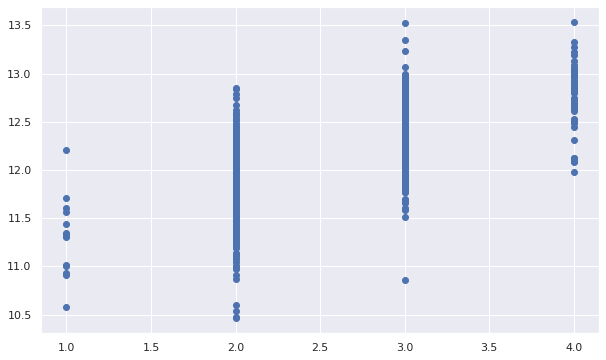

In [1044]:
#Plot ExterQual_E vs SalePrice
plt.scatter(df_train['ExterQual_E'],df_train['SalePrice_Log'])

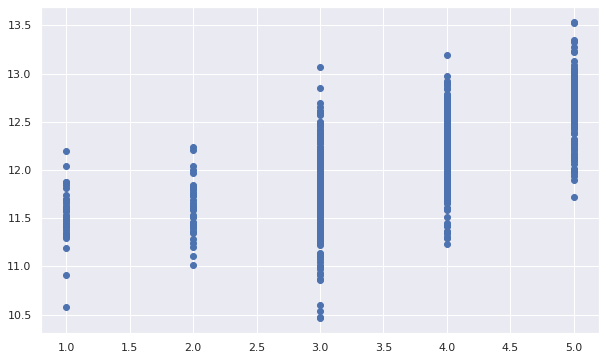

In [1045]:
#Plot BsmtQual_E vs SalePrice
plt.scatter(df_train['BsmtQual_E'],df_train['SalePrice_Log'])

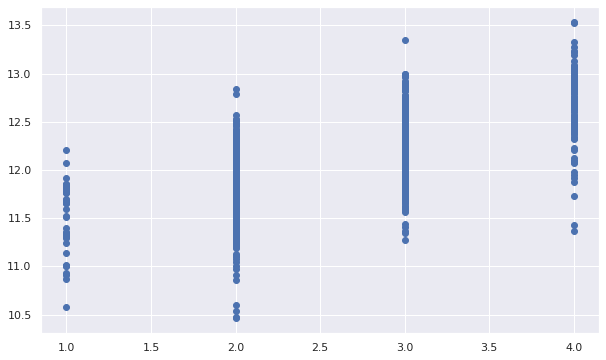

In [1046]:
#Plot KitchenQual_E vs SalePrice
plt.scatter(df_train['KitchenQual_E'],df_train['SalePrice_Log'])

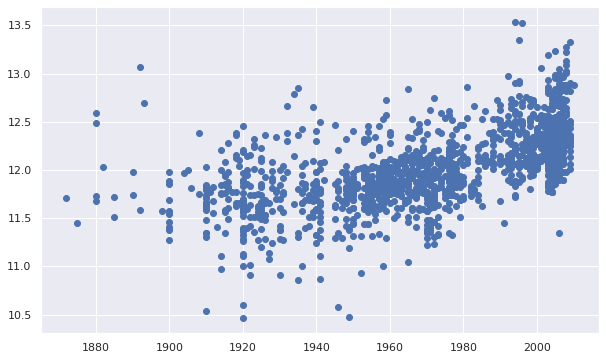

In [1047]:
#Plot YearBuilt vs SalePrice
plt.scatter(df_train['YearBuilt'],df_train['SalePrice_Log'])

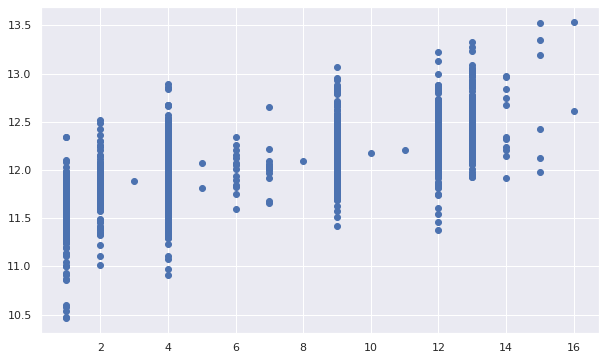

In [1048]:
#Plot FullBath vs SalePrice
plt.scatter(df_train['TotalBaths_E'],df_train['SalePrice_Log'])

In [1049]:
#Correlation with target variable
cor = df_train.corr()
cor_target = abs(cor['SalePrice_Log'])
#Selecting highly correlated features to target variable
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual       0.817184
YearBuilt         0.586570
YearRemodAdd      0.565608
TotRmsAbvGrd      0.534422
GarageCars        0.680625
SalePrice         0.948374
TotalSF           0.773277
SalePrice_Log     1.000000
Neighborhood_E    0.742641
ExterQual_E       0.678840
Foundation_E      0.550411
BsmtQual_E        0.647718
KitchenQual_E     0.667893
FireplaceQu_E     0.547151
GarageType_E      0.575628
GarageFinish_E    0.604878
TotalBaths_E      0.674967
Name: SalePrice_Log, dtype: float64

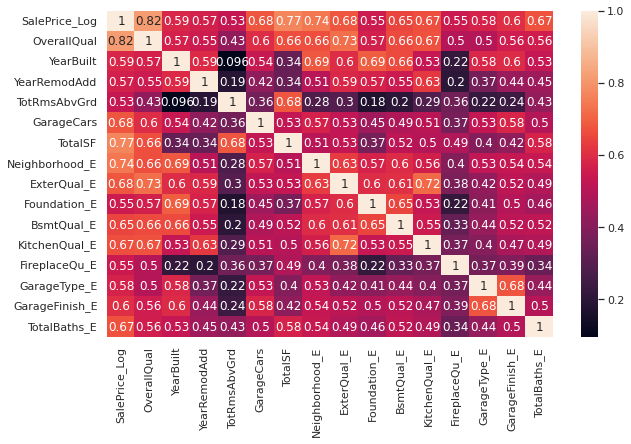

In [1050]:
# Check the correlations between relevant features to confirm no confounding variables (>0.8 correlation)
sns.heatmap(df_train[['SalePrice_Log','OverallQual','YearBuilt','YearRemodAdd','TotRmsAbvGrd','GarageCars','TotalSF','Neighborhood_E','ExterQual_E','Foundation_E','BsmtQual_E','KitchenQual_E','FireplaceQu_E','GarageType_E','GarageFinish_E','TotalBaths_E']].corr(), annot=True)
plt.show()

### Temporal Variable Analysis

In [1051]:
#Temporal Variables
year_feature = [features for features in quantitative if 'Yr' in features or 'Year' in features]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

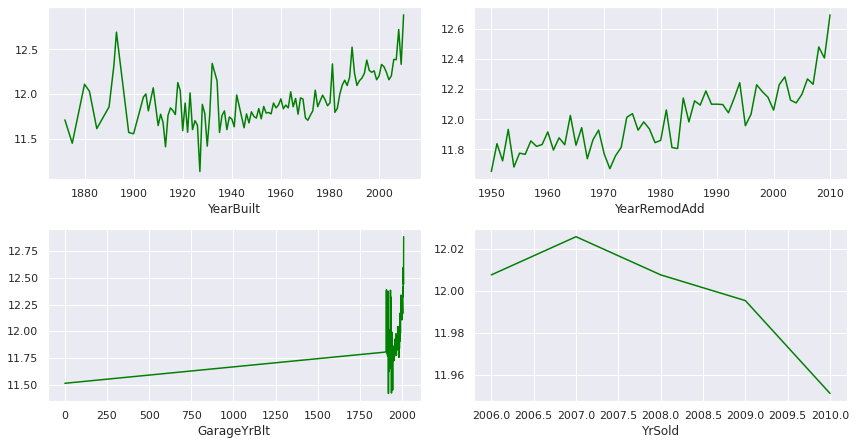

In [1052]:
# Establishing relationship between Year Features and dependent feature Sale Price

sns.set_style('darkgrid')
fig=plt.figure(figsize=(12,12))

a=len(year_feature)   # No. of rows in subplot
b=2                   # No. of plots in each row
c=1                   # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in year_feature:
    plt.subplot(a,b,c)
    
    # Plotting median prices for each features grouping by Year
    data.groupby(features)['SalePrice_Log'].median().plot(color='green')
    plt.xticks(rotation=0)  # Using Xticks so that the label in in proper orientation
    c=c+1 # Incrementing figure counter

fig.tight_layout()
plt.show()

As houses get older their value declines. This could be due to structural depreciation or the internal house becoming outdated as styles change over the years. We can confirm this by plotting the year the house was built or remodeled and the year it was sold. 

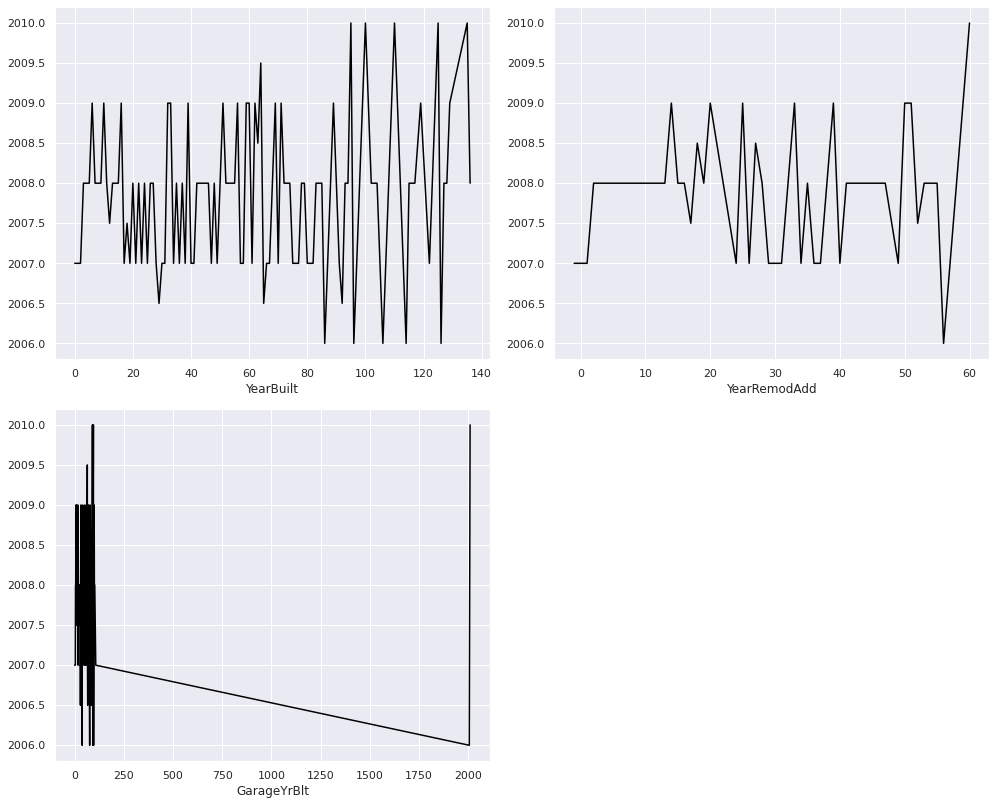

In [1053]:
#Plot the difference between each Year Feature with YrSold

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,22))

a=len(year_feature)   # No. of rows in subplot
b=2                   # No. of plots in each row
c=1                   # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in year_feature:
    if features != 'YrSold':
        # Finding the difference between Year feature and Year Sold
        data[features] = data['YrSold'] - data[features]
        plt.subplot(a,b,c)
        data.groupby(features)['YrSold'].median().plot(color='black')
        c = c+1

fig.tight_layout()
plt.show()

### Feature Variable Selection

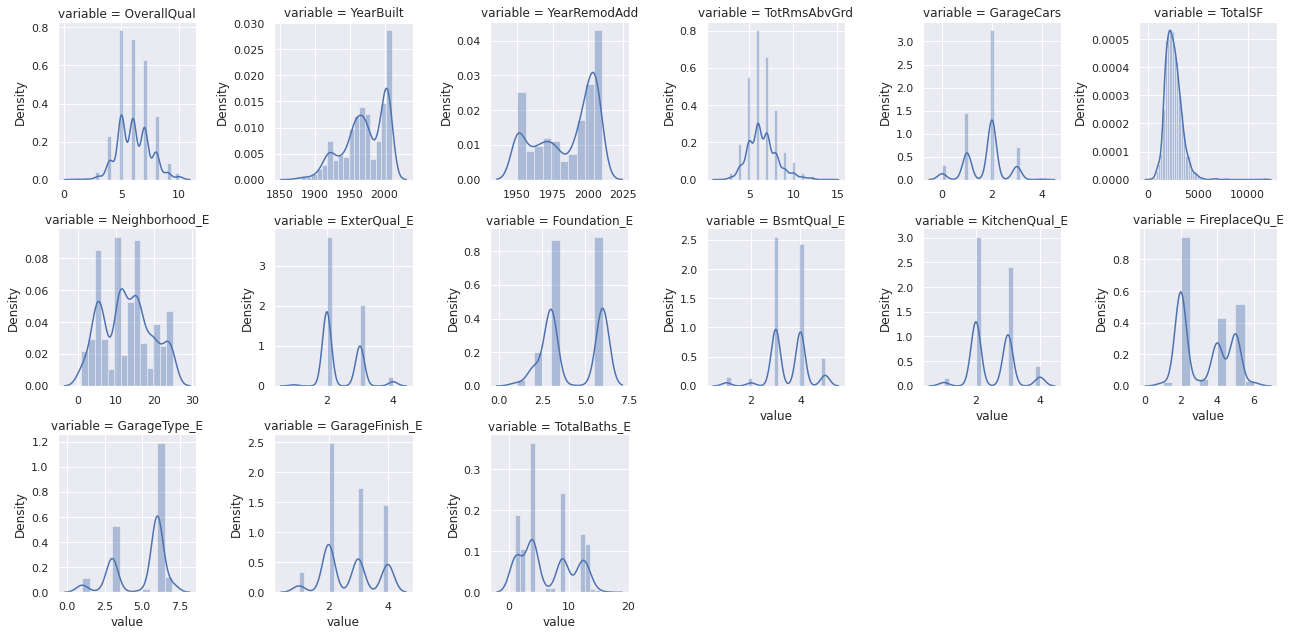

In [1054]:
#Plot distributions of feature variables
top_features = ['OverallQual','YearBuilt','YearRemodAdd','TotRmsAbvGrd','GarageCars','TotalSF','Neighborhood_E','ExterQual_E',
            'Foundation_E','BsmtQual_E','KitchenQual_E','FireplaceQu_E','GarageType_E','GarageFinish_E','TotalBaths_E']

f = pd.melt(df_train, value_vars=top_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")            

##Test Data

In [1055]:
house_test = df_test.copy()

In [1056]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1057]:
#Add TotalBaths variable
house_test['Baths'] = house_test['BsmtFullBath'] + house_test['FullBath'] 
house_test['HalfBaths'] = house_test['BsmtHalfBath'] + house_test['HalfBath']
house_test['TotalBaths'] = house_test['Baths'].map(str) + 'Full,' + house_test['HalfBaths'].map(str) + 'Half'

In [1058]:
#Add TotalSF variable
house_test['TotalSF'] = house_test['TotalBsmtSF'] + house_test['GrLivArea']

In [1059]:
#Create quantitative and qualitative independent variable sets
quantitative = [f for f in house_test.columns if house_test.dtypes[f] != 'object']
quantitative.remove('Id')
qualitative = [f for f in house_test.columns if house_test.dtypes[f] == 'object']

#Check number of each variable type
print("Number of Numerical features: ", len(quantitative))
print("Number of Categorical features: ", len(qualitative))

Number of Numerical features:  39
Number of Categorical features:  44


In [1060]:
#Replace null values with value of 0 for quantitative data and 'Missing' for qualitative data
for c in qualitative:
    house_test[c] = house_test[c].astype('category')
    if house_test[c].isnull().any():
        house_test[c] = house_test[c].cat.add_categories(['Missing'])
        house_test[c] = house_test[c].fillna('Missing')

house_test[quantitative] = house_test[quantitative].fillna(0)

In [1061]:
#Encode qualitative data to link each qualitative variable type to a number based on SalePrice
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'Id']].groupby(feature).mean()['Id']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(house_test, q)
    qual_encoded.append(q+'_E')
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Baths,HalfBaths,TotalBaths,TotalSF,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E,TotalBaths_E
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,1.0,0.0,"1.0Full,0.0Half",1778.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,13.0,6.0,3.0,4.0,1.0,4.0,1.0,3.0,6.0,3.0,4.0,3.0,3.0,4.0,2.0,1.0,3.0,1.0,3.0,2.0,1.0,1.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,5.0,3.0,6.0,2.0,11.0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,1.0,1.0,"1.0Full,1.0Half",2658.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,13.0,5.0,3.0,4.0,1.0,2.0,1.0,8.0,11.0,2.0,4.0,3.0,3.0,4.0,2.0,1.0,4.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,3.0,2.0,6.0,2.0,12.0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,2.0,1.0,"2.0Full,1.0Half",2557.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,3.0,5.0,3.0,4.0,2.0,4.0,1.0,3.0,6.0,3.0,4.0,3.0,1.0,2.0,2.0,1.0,1.0,5.0,3.0,4.0,1.0,1.0,4.0,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,5.0,3.0,6.0,2.0,9.0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,2.0,1.0,"2.0Full,1.0Half",2530.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,3.0,5.0,3.0,4.0,2.0,4.0,1.0,3.0,6.0,2.0,4.0,3.0,1.0,4.0,2.0,1.0,1.0,5.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,6.0,2.0,9.0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,

In [1062]:
ID = house_test['Id']
top_features = ['OverallQual','YearBuilt','YearRemodAdd','TotRmsAbvGrd','GarageCars','TotalSF','Neighborhood_E','ExterQual_E',
            'Foundation_E','BsmtQual_E','KitchenQual_E','FireplaceQu_E','GarageType_E','GarageFinish_E','TotalBaths_E']
house_test = house_test[top_features]
house_test.head()

,OverallQual,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageCars,TotalSF,Neighborhood_E,ExterQual_E,Foundation_E,BsmtQual_E,KitchenQual_E,FireplaceQu_E,GarageType_E,GarageFinish_E,TotalBaths_E
0,5,1961,1961,5,1.0,1778.0,13.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,11.0
1,6,1958,1958,6,1.0,2658.0,13.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,12.0
2,5,1997,1998,6,2.0,2557.0,3.0,4.0,1.0,2.0,4.0,2.0,3.0,1.0,9.0
3,6,1998,1998,7,2.0,2530.0,3.0,4.0,1.0,4.0,3.0,1.0,3.0,1.0,9.0
4,8,1992,1992,5,2.0,2560.0,15.0,3.0,1.0,2.0,3.0,4.0,3.0,2.0,10.0


##Modeling

###Splitting Train Set to Create Models

In [1063]:
X = df_train[top_features]
y = df_train['SalePrice']

In [1064]:
from sklearn.model_selection import train_test_split

In [1065]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [1066]:
print("X_train shape is:",X_train.shape)

X_train shape is: (978, 15)


In [1067]:
print("X_test shape is:",X_test.shape)

X_test shape is: (482, 15)


In [1068]:
print("y_train shape is:",y_train.shape)

y_train shape is: (978,)


In [1069]:
print("y_test shape is:",y_test.shape)

y_test shape is: (482,)


In [1070]:
from sklearn.ensemble import RandomForestRegressor

In [1071]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:49])
RandomForestRegressorModel.score(X_test,y_test)

Random Forest Regressor Train Score is :  0.9755900117930407
Random Forest Regressor Test Score is :  0.8728995831378608
Random Forest Regressor No. of features are :  15
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [271759.2        125317.67480337 115703.85331435 229771.24183384
  94358.7849197  116470.34816974 239054.42003128 121451.45854509
 539957.45       147994.9025     219846.03701944 193213.16441103
 219754.64018435 125082.71424895 121915.85145896 149306.73738957
 201918.69013063 129341.47056163 144915.1495366  197683.06802642
 132891.05384477 144253.59079673  86779.42274854 175945.42215451
 205149.42705614 186870.7840368  176390.55836492  79570.42357226
 337964.8275     123897.317354   141818.58466811 186796.68443284
 130048.05395822 277100.8772023  367340.368      164600.4728013
 302626.48       131125.21236424 240394.31643061 339291.36227591
 201220.33117212 118553.92626192 186675.07149329 318862.23448829
 344303.8297

0.8728995831378608

In [1072]:
from sklearn.metrics import mean_squared_error

In [1073]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  822752190.6032897


In [1074]:
from sklearn.tree import DecisionTreeRegressor

In [1075]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=8,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')
y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])
DecisionTreeRegressorModel.score(X_test,y_test)

DecisionTreeRegressor Train Score is :  0.9680237938716971
DecisionTreeRegressor Test Score is :  0.8321900185420978
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [250000.         139171.42857143 108932.75862069 241576.
 137450.         108932.75862069 226308.6875     122333.33333333
 625000.         147517.33333333]


0.8321900185420978

In [1076]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1086275192.9393053


In [1077]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': y_pred})
output.to_csv('hp_submission1.csv', index=False)

###Modeling with Test Data

In [1078]:
X_train = df_train[top_features]

In [1079]:
y_train = df_train['SalePrice_Log']

In [1080]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [1081]:
#feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [1082]:
# Getting all the important features
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True])

In [1083]:
selected = X_train.columns[(feature_sel_model.get_support())]
len(selected)

12

In [1084]:
# Getting all the selected features in X_train
X_train = X_train[selected]

In [1085]:
X_test = house_test[selected]
X_test.shape

(1459, 12)

In [1086]:
# We will use cross validation for testing models
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=10,shuffle=True,random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score = [r2_val_score.mean()]
    return score

Linear Regression 

In [1087]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
Lr = LinearRegression(normalize=True, n_jobs=-1)

In [1088]:
test_model(Lr)

[0.844442153095317]

Ridge Regression

In [1089]:
Rdg = Ridge(alpha = 1e-4, normalize=True)
test_model(Rdg)

[0.8444465526510267]

Lasso Regression

In [1090]:
Las = Lasso(alpha = 1e-4, normalize=True)
test_model(Las)

[0.8444734369956306]

Decision Tree Regression 

In [1091]:
from sklearn.tree import DecisionTreeRegressor
DCR = DecisionTreeRegressor(max_depth=5)

In [1092]:
test_model(DCR)

[0.7815102330098451]

##Building the Lasso Model

In [1093]:
Las.fit(X_train,y_train)
y_pred = np.exp(Las.predict(X_test)).round(2)

In [1094]:
y_pred

array([139188.69, 162913.89, 142169.93, ..., 178377.26, 159816.47,
       225117.64])

In [1095]:
import xgboost
xgb3 = xgboost.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

test_model(xgb3)

[01:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[0.8850186717617167]

In [1096]:
xgb3.fit(X_train,y_train)
y_pred_xgb3 = np.exp(xgb3.predict(X_test)).round(2)

[01:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1097]:
submit_test1 = pd.concat([ID,pd.DataFrame(y_pred_xgb3)],axis=1)
submit_test1.columns = ['Id','SalePrice']

In [1100]:
submit_test1.head()

,Id,SalePrice
0,1461,140373.937500
1,1462,157107.781250
2,1463,163994.687500
3,1464,157539.734375
4,1465,193448.875000


In [1102]:
# Submitting the output
submit_test1.to_csv('hp_submission1.csv',index=False)

##Conclusion